# STATS

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
season = pd.read_csv('understat.csv')
game = pd.read_csv('understat_per_game.csv')

In [75]:
# setting up season
dfs = season.copy()
dfs.rename({season.columns[0]:'league',season.columns[1]:'year'},axis=1,inplace=True)

In [76]:
dfs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 684 entries, 0 to 683
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   league        684 non-null    object 
 1   year          684 non-null    int64  
 2   position      684 non-null    int64  
 3   team          684 non-null    object 
 4   matches       684 non-null    int64  
 5   wins          684 non-null    int64  
 6   draws         684 non-null    int64  
 7   loses         684 non-null    int64  
 8   scored        684 non-null    int64  
 9   missed        684 non-null    int64  
 10  pts           684 non-null    int64  
 11  xG            684 non-null    float64
 12  xG_diff       684 non-null    float64
 13  npxG          684 non-null    float64
 14  xGA           684 non-null    float64
 15  xGA_diff      684 non-null    float64
 16  npxGA         684 non-null    float64
 17  npxGD         684 non-null    float64
 18  ppda_coef     684 non-null    

In [77]:
dfs['league'].drop_duplicates()

0         La_liga
120           EPL
240    Bundesliga
348       Serie_A
468       Ligue_1
588          RFPL
Name: league, dtype: object

In [78]:
leagues_in_focus = ['La_liga','EPL','Bundesliga']

In [79]:
dfs = dfs[dfs['league'].isin(leagues_in_focus)].copy()

In [80]:
dfs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 348 entries, 0 to 347
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   league        348 non-null    object 
 1   year          348 non-null    int64  
 2   position      348 non-null    int64  
 3   team          348 non-null    object 
 4   matches       348 non-null    int64  
 5   wins          348 non-null    int64  
 6   draws         348 non-null    int64  
 7   loses         348 non-null    int64  
 8   scored        348 non-null    int64  
 9   missed        348 non-null    int64  
 10  pts           348 non-null    int64  
 11  xG            348 non-null    float64
 12  xG_diff       348 non-null    float64
 13  npxG          348 non-null    float64
 14  xGA           348 non-null    float64
 15  xGA_diff      348 non-null    float64
 16  npxGA         348 non-null    float64
 17  npxGD         348 non-null    float64
 18  ppda_coef     348 non-null    

In [81]:
# setting up game
dfg = game.copy()
dfg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24580 entries, 0 to 24579
Data columns (total 29 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   league        24580 non-null  object 
 1   year          24580 non-null  int64  
 2   h_a           24580 non-null  object 
 3   xG            24580 non-null  float64
 4   xGA           24580 non-null  float64
 5   npxG          24580 non-null  float64
 6   npxGA         24580 non-null  float64
 7   deep          24580 non-null  int64  
 8   deep_allowed  24580 non-null  int64  
 9   scored        24580 non-null  int64  
 10  missed        24580 non-null  int64  
 11  xpts          24580 non-null  float64
 12  result        24580 non-null  object 
 13  date          24580 non-null  object 
 14  wins          24580 non-null  int64  
 15  draws         24580 non-null  int64  
 16  loses         24580 non-null  int64  
 17  pts           24580 non-null  int64  
 18  npxGD         24580 non-nu

In [82]:
dfs.iloc[:,].head()

,league,year,position,team,matches,wins,draws,loses,scored,missed,...,xGA,xGA_diff,npxGA,npxGD,ppda_coef,oppda_coef,deep,deep_allowed,xpts,xpts_diff
0,La_liga,2014,1,Barcelona,38,30,4,4,110,21,...,28.444293,7.444293,24.727907,73.049305,5.683535,16.367593,489,114,94.0813,0.0813
1,La_liga,2014,2,Real Madrid,38,30,2,6,118,38,...,42.607198,4.607198,38.890805,47.213090,10.209085,12.929510,351,153,81.7489,-10.2511
2,La_liga,2014,3,Atletico Madrid,38,23,9,6,67,29,...,29.069107,0.069107,26.839271,25.748737,8.982028,9.237091,197,123,73.1353,-4.8647
3,La_liga,2014,4,Valencia,38,22,11,5,70,32,...,39.392572,7.392572,33.446477,16.257501,8.709827,7.870225,203,172,63.7068,-13.2932
4,La_liga,2014,5,Sevilla,38,23,7,8,71,45,...,47.862742,2.862742,41.916529,20.178070,8.276148,9.477805,305,168,67.3867,-8.6133


In [83]:
dfg = dfg[dfg['league'].isin(leagues_in_focus)].copy()

In [84]:
dfg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12792 entries, 0 to 12791
Data columns (total 29 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   league        12792 non-null  object 
 1   year          12792 non-null  int64  
 2   h_a           12792 non-null  object 
 3   xG            12792 non-null  float64
 4   xGA           12792 non-null  float64
 5   npxG          12792 non-null  float64
 6   npxGA         12792 non-null  float64
 7   deep          12792 non-null  int64  
 8   deep_allowed  12792 non-null  int64  
 9   scored        12792 non-null  int64  
 10  missed        12792 non-null  int64  
 11  xpts          12792 non-null  float64
 12  result        12792 non-null  object 
 13  date          12792 non-null  object 
 14  wins          12792 non-null  int64  
 15  draws         12792 non-null  int64  
 16  loses         12792 non-null  int64  
 17  pts           12792 non-null  int64  
 18  npxGD         12792 non-nu

### Data visualization

In [31]:
cor_matrix = dfs.corr().abs()
#print(cor_matrix)

In [32]:
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
#print(upper_tri)

In [33]:
#to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.90)]
#print(to_drop)

In [34]:
dfs = dfs.drop(dfs[to_drop], axis=1)

In [35]:
dfs.head()

,league,year,position,team,matches,draws,scored,missed,xG_diff,xGA,xGA_diff,ppda_coef,oppda_coef,deep,deep_allowed,xpts_diff
0,La_liga,2014,1,Barcelona,38,4,110,21,-7.019848,28.444293,7.444293,5.683535,16.367593,489,114,0.0813
1,La_liga,2014,2,Real Madrid,38,2,118,38,-22.233757,42.607198,4.607198,10.209085,12.929510,351,153,-10.2511
2,La_liga,2014,3,Atletico Madrid,38,9,67,29,-9.952330,29.069107,0.069107,8.982028,9.237091,197,123,-4.8647
3,La_liga,2014,4,Valencia,38,11,70,32,-14.937500,39.392572,7.392572,8.709827,7.870225,203,172,-13.2932
4,La_liga,2014,5,Sevilla,38,7,71,45,-1.473376,47.862742,2.862742,8.276148,9.477805,305,168,-8.6133


In [61]:
# Creating a correlation heatmap
def cor_heatmap(cor):
    plt.figure(figsize=(15,12))
    
    mask_annot = np.absolute(cor.values) >= 0.9
    annot = np.where(mask_annot, cor.values, np.full(cor.shape,""))
    #ns.heatmap(data = cor, annot = annot, cmap = plt.cm.BuGn, fmt='.4')
    sns.heatmap(data = cor, annot = annot, cmap = plt.cm.YlGn, fmt='.4')
    #sns.heatmap(data = cor, annot = annot, cmap = plt.cm.RdYlGn, fmt='.3')
    #ns.heatmap(data = cor, annot = annot, cmap = plt.cm.Spectral, fmt='.3)
plt.show()

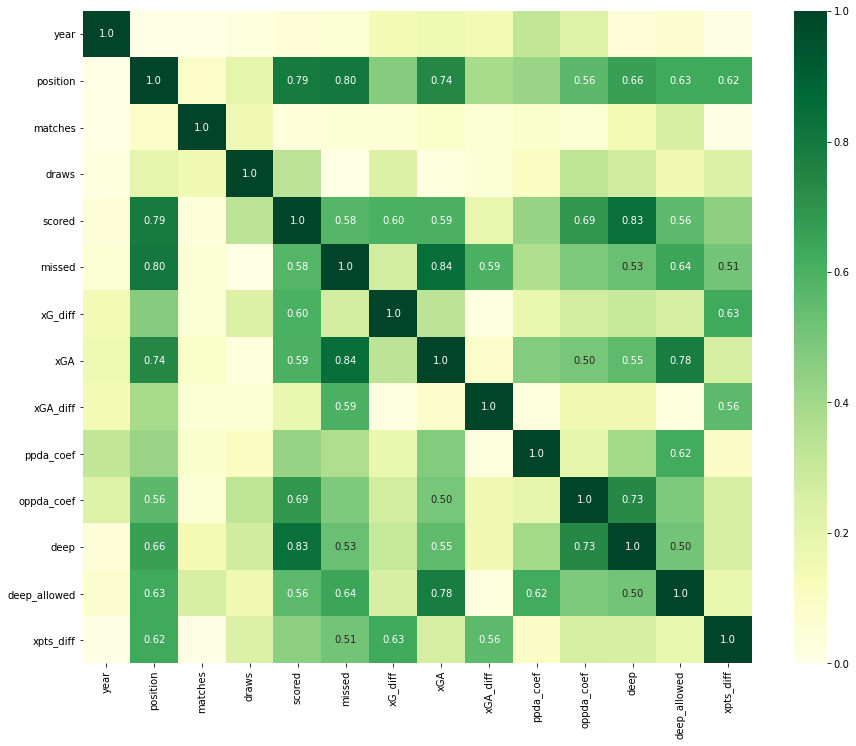

In [37]:
cor_heatmap(dfs.corr(method='pearson').abs())

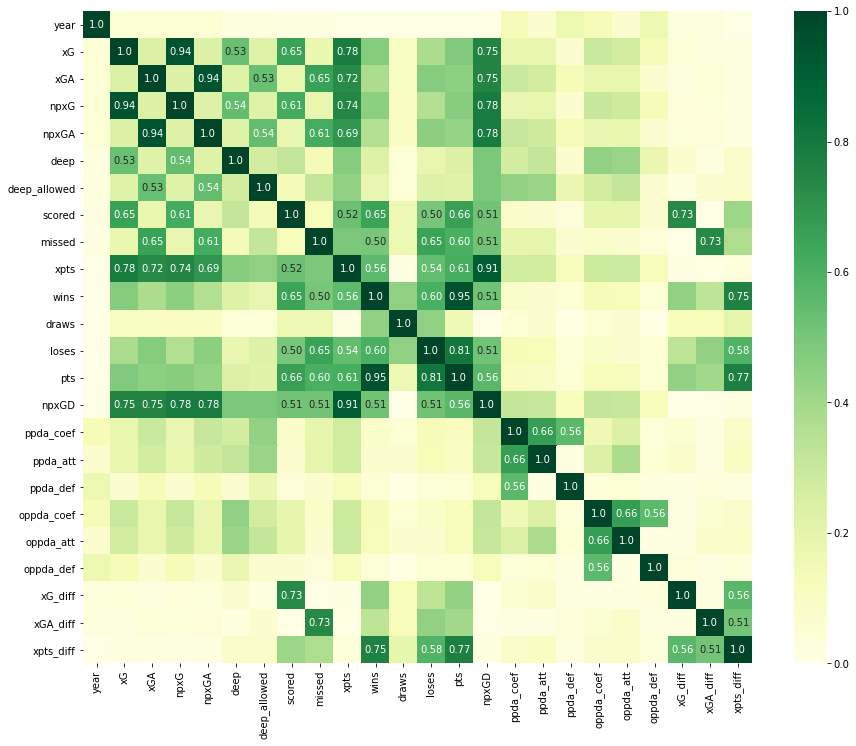

In [38]:
cor_heatmap(dfg.corr(method='pearson').abs())

In [39]:
dfg.columns

Index(['league', 'year', 'h_a', 'xG', 'xGA', 'npxG', 'npxGA', 'deep',
       'deep_allowed', 'scored', 'missed', 'xpts', 'result', 'date', 'wins',
       'draws', 'loses', 'pts', 'npxGD', 'ppda_coef', 'ppda_att', 'ppda_def',
       'oppda_coef', 'oppda_att', 'oppda_def', 'team', 'xG_diff', 'xGA_diff',
       'xpts_diff'],
      dtype='object')

In [40]:
num_var2 = ['xG', 'xGA', 'npxG', 'npxGA', 'deep',
            'deep_allowed', 'scored', 'missed', 'xpts',
            'npxGD', 'ppda_coef', 'ppda_att', 
            'ppda_def','oppda_coef', 'oppda_att', 
            'oppda_def', 'xG_diff', 'xGA_diff','xpts_diff']

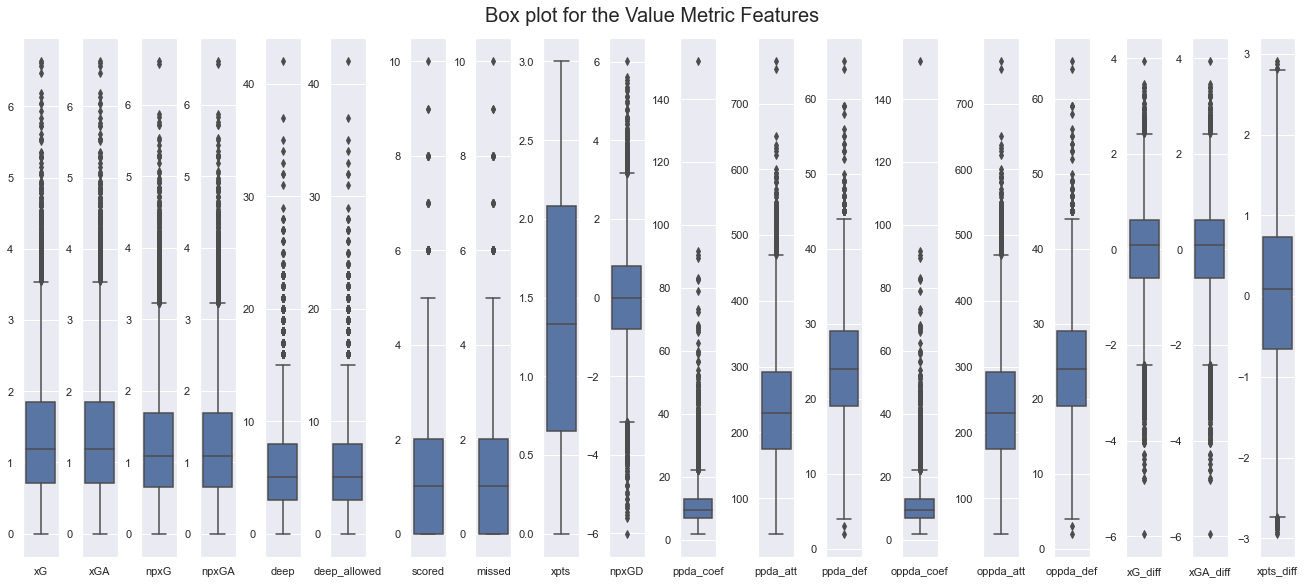

In [41]:
sns.set()

value = dfg[num_var2]
plot_features = value.columns
fig, axes = plt.subplots(1, len(plot_features), figsize=(18,8), constrained_layout=True)
j=0
k=1

for i in zip(axes, plot_features):
    sns.boxplot(data=value.iloc[:,j:k], ax=i[0])
    j=j+1
    k=k+1
    
plt.suptitle("Box plot for the Value Metric Features", fontsize=20)
plt.show()

# CLUSTER

xG - expected goals metric, it is a statistical measure of the quality of chances created and conceded. More at understat.com

xG_diff - difference between actual goals scored and expected goals.

npxG - expected goals without penalties and own goals.

xGA - expected goals against.

xGA_diff - difference between actual goals missed and expected goals against.

npxGA - expected goals against without penalties and own goals.

npxGD - difference between "for" and "against" expected goals without penalties and own goals.

ppda_coef - passes allowed per defensive action in the opposition half (power of pressure)

oppda_coef - opponent passes allowed per defensive action in the opposition half (power of opponent's pressure)

deep - passes completed within an estimated 20 yards of goal (crosses excluded)

deep_allowed - opponent passes completed within an estimated 20 yards of goal (crosses excluded)

In [42]:
var = ['xG','xGA','ppda_coef','oppda_coef','deep','deep_allowed','scored','missed']

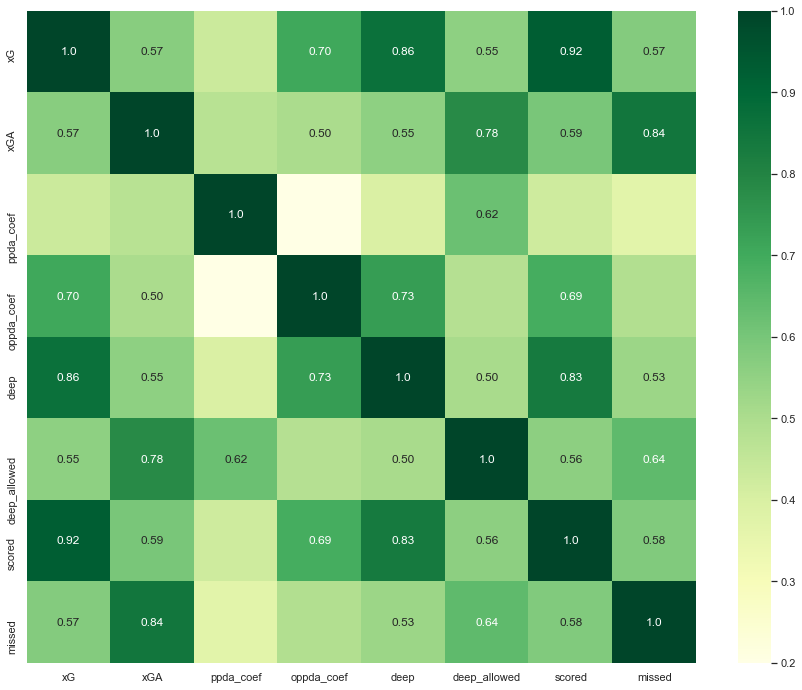

In [50]:
cor_heatmap(dfs[var].corr(method='pearson').abs())

In [110]:
# Creating a correlation heatmap
def cor_heatmap(cor):
    #plt.figure(figsize=(15,12))
    mask_ut=np.triu(np.ones(cor.shape)).astype(np.bool)
    mask_annot = np.absolute(cor.values) >= 0.9
    annot = np.where(mask_annot, cor.values, np.full(cor.shape,""))
    #ns.heatmap(data = cor, annot = annot, cmap = plt.cm.BuGn, fmt='.4')
    sns.heatmap(data = cor,mask=mask_ut, annot = annot, cmap = plt.cm.YlGn, fmt='.4')
    #sns.heatmap(data = cor, annot = annot, cmap = plt.cm.RdYlGn, fmt='.3')
    #ns.heatmap(data = cor, annot = annot, cmap = plt.cm.Spectral, fmt='.3)4
    plt.show()

In [90]:
dfs = dfs.rename(columns={'xG': 'Expected Goals', 'xGA': 'Expected Goals Against', 'ppda_coef': 'Passes Allowed Defending', 'oppda_coef': 'Passes Completed Attacking', 'deep': 'Dangerous Passes Completed', 'deep_allowed': 'Dangerous Passes Allowed'})
dfs

,league,year,position,team,matches,wins,draws,loses,scored,missed,...,Expected Goals Against,xGA_diff,npxGA,npxGD,Passes Allowed Defending,Passes Completed Attacking,Dangerous Passes Completed,Dangerous Passes Allowed,xpts,xpts_diff
0,La_liga,2014,1,Barcelona,38,30,4,4,110,21,...,28.444293,7.444293,24.727907,73.049305,5.683535,16.367593,489,114,94.0813,0.0813
1,La_liga,2014,2,Real Madrid,38,30,2,6,118,38,...,42.607198,4.607198,38.890805,47.213090,10.209085,12.929510,351,153,81.7489,-10.2511
2,La_liga,2014,3,Atletico Madrid,38,23,9,6,67,29,...,29.069107,0.069107,26.839271,25.748737,8.982028,9.237091,197,123,73.1353,-4.8647
3,La_liga,2014,4,Valencia,38,22,11,5,70,32,...,39.392572,7.392572,33.446477,16.257501,8.709827,7.870225,203,172,63.7068,-13.2932
4,La_liga,2014,5,Sevilla,38,23,7,8,71,45,...,47.862742,2.862742,41.916529,20.178070,8.276148,9.477805,305,168,67.3867,-8.6133
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,Bundesliga,2019,14,Augsburg,34,9,9,16,45,63,...,59.119342,-3.880658,58.361730,-18.294165,16.804008,8.402157,133,223,39.7766,3.7766
344,Bundesliga,2019,15,FC Cologne,34,10,6,18,51,69,...,54.544334,-14.455666,49.997671,-3.751162,11.448608,10.410441,167,226,43.8903,7.8903
345,Bundesliga,2019,16,Werder Bremen,34,8,7,19,42,69,...,56.939854,-12.060146,56.182084,-22.990440,12.852066,11.041743,186,205,35.1185,4.1185
346,Bundesliga,2019,17,Fortuna Duesseldorf,34,6,12,16,36,67,...,64.448134,-2.551866,60.659343,-27.999481,16.810429,11.745078,143,207,32.8686,2.8686


In [91]:
final = ['Expected Goals','Expected Goals Against','Passes Allowed Defending','Passes Completed Attacking','Dangerous Passes Completed','Dangerous Passes Allowed']

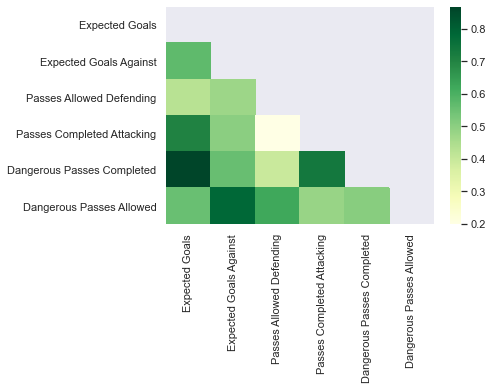

<Figure size 432x288 with 0 Axes>

In [109]:
cor_heatmap(dfs[final].corr().abs())

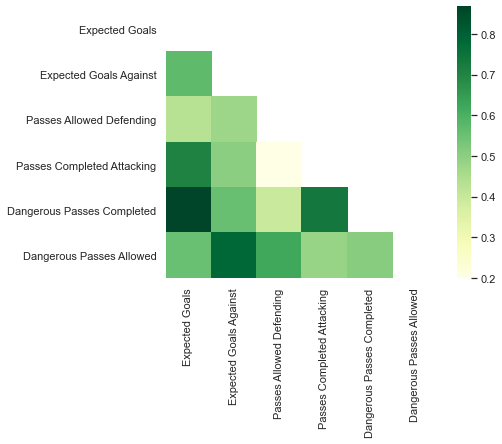

In [116]:
def heatmap(df):
    corr = df
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = True
    with sns.axes_style("white"):
        f, ax = plt.subplots(figsize=(7, 5))
        for item in [f, ax]:
            item.patch.set_visible(False)
        ax = sns.heatmap(corr, mask=mask, square=True,cmap = plt.cm.YlGn)
        
heatmap(dfs[final].corr().abs()) 

In [44]:
import statsmodels.api as sm

mod = sm.OLS(dfs['pts'],dfs[final])
res = mod.fit()
print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:                    pts   R-squared (uncentered):                   0.972
Model:                            OLS   Adj. R-squared (uncentered):              0.972
Method:                 Least Squares   F-statistic:                              3981.
Date:                Wed, 27 Jan 2021   Prob (F-statistic):                        0.00
Time:                        22:26:11   Log-Likelihood:                         -2448.0
No. Observations:                 684   AIC:                                      4908.
Df Residuals:                     678   BIC:                                      4935.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

In [45]:
finalvar = ['xG','xGA','ppda_coef','oppda_coef','deep_allowed']

### Using a Decision Tree
We get the normalized total reduction of the criterion (gini or entropy) brought by that feature (also known as Gini importance).

In [83]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder

In [90]:
df_out = dfs[finalvar].copy()

# Use StandardScaler to scale the data
scaler = StandardScaler()
scaled_feat = scaler.fit_transform(df_out)
#scaled_feat

# See what the fit method is doing (notice the trailing underscore):
print("Parameters fitted:\n", scaler.mean_, "\n", scaler.var_)

df_norm = pd.DataFrame(scaled_feat, columns = finalvar)
df_norm.head()

# Checking max and min of minmaxed variables
df_norm.describe().round(2)

Parameters fitted:
 [ 47.06474356  47.06474356  10.91178382  10.91177209 208.67690058] 
 [ 212.72847466  138.59842698    6.34815543   10.88337043 2989.2040863 ]


,xG,xGA,ppda_coef,oppda_coef,deep_allowed
count,684.00,684.00,684.00,684.00,684.00
mean,0.00,0.00,0.00,-0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00
min,-2.19,-2.57,-2.08,-1.98,-2.30
25%,-0.68,-0.69,-0.72,-0.64,-0.71
50%,-0.16,0.02,-0.14,-0.17,-0.07
75%,0.47,0.66,0.60,0.39,0.69
max,4.56,3.51,4.36,5.93,3.04


In [56]:
from sklearn.cluster import DBSCAN, KMeans, AgglomerativeClustering
from sklearn.base import clone
from sklearn.metrics import pairwise_distances
from scipy.cluster.hierarchy import dendrogram
from sklearn.manifold import TSNE
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.model_selection import train_test_split
import graphviz


In [91]:
# Preparing the data
X = dfs[finalvar]
y = dfs['pts']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=5
)

In [92]:
# Fitting the decision tree
dt = DecisionTreeRegressor(max_depth=4)
dt.fit(X_train, y_train)
print("It is estimated that in average, we are able to predict {0:.2f}% of the customers correctly".format(dt.score(X_test, y_test)*100))

It is estimated that in average, we are able to predict 72.14% of the customers correctly


In [93]:
# Assessing feature importance
pd.Series(dt.feature_importances_, index=X_train.columns)

xG              0.861352
xGA             0.121970
ppda_coef       0.000000
oppda_coef      0.000000
deep_allowed    0.016678
dtype: float64

In [94]:
# Predicting the cluster labels of the outliers
df_out['PredictedPoints'] = dt.predict(df_out)
df_out.head()

,xG,xGA,ppda_coef,oppda_coef,deep_allowed,PredictedPoints
0,102.980152,28.444293,5.683535,16.367593,114,90.666667
1,95.766243,42.607198,10.209085,12.929510,153,90.666667
2,57.047670,29.069107,8.982028,9.237091,123,82.066667
3,55.062500,39.392572,8.709827,7.870225,172,71.354167
4,69.526624,47.862742,8.276148,9.477805,168,68.692308


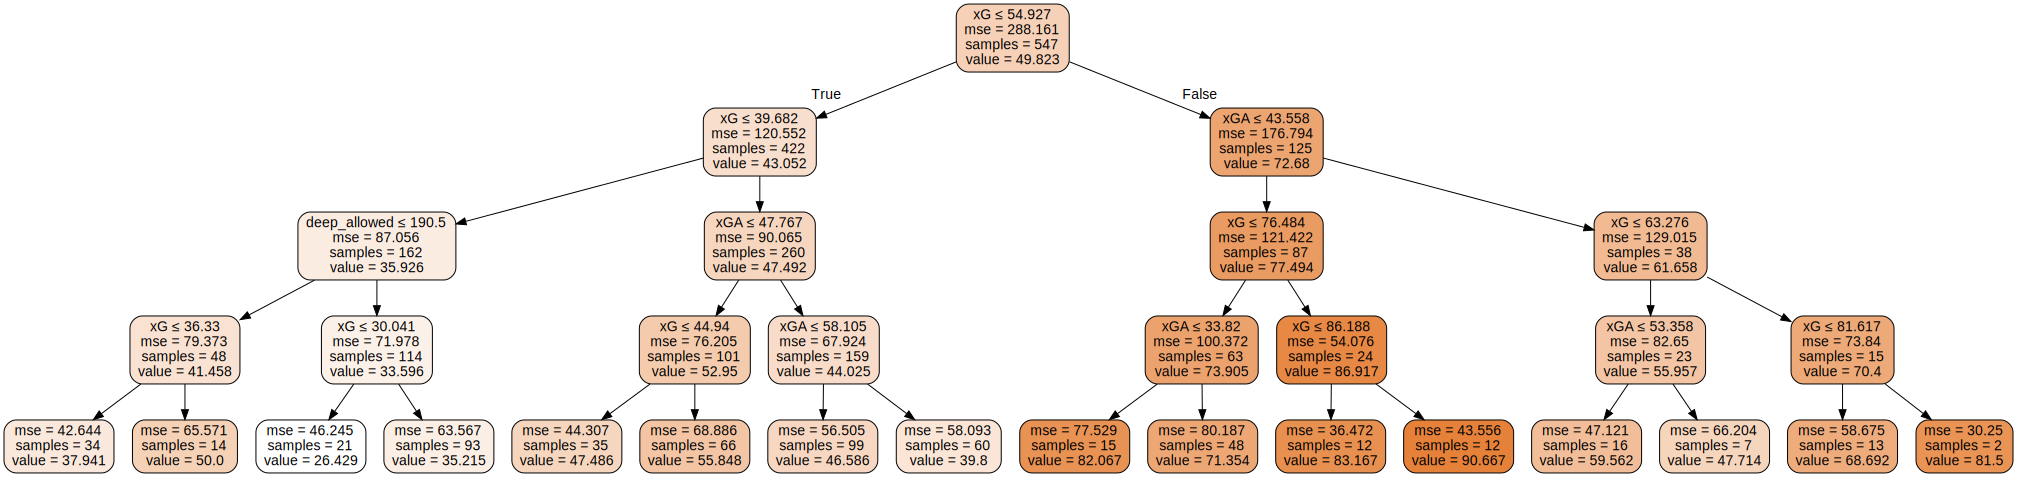

In [95]:
# Visualizing the decision tree
dot_data = export_graphviz(dt, out_file=None, 
                           feature_names=X.columns.to_list(),
                           filled=True,
                           rounded=True,
                           special_characters=True)  
graphviz.Source(dot_data)

In [96]:
def get_ss(df):
    """Computes the sum of squares for all variables given a dataset
    """
    ss = np.sum(df.var() * (df.count() - 1))
    return ss  # return sum of sum of squares of each df variable

def r2(df, labels):
    sst = get_ss(df)
    ssw = np.sum(df.groupby(labels).apply(get_ss))
    return 1 - ssw/sst
    
def get_r2_scores(df, clusterer, min_k=2, max_k=10):
    """
    Loop over different values of k. To be used with sklearn clusterers.
    """
    r2_clust = {}
    for n in range(min_k, max_k):
        clust = clone(clusterer).set_params(n_clusters=n)
        labels = clust.fit_predict(df)
        r2_clust[n] = r2(df, labels)
    return r2_clust


# Set up the clusterers
kmeans = KMeans(
    init='k-means++',
    n_init=20,
    random_state=42
)

hierarchical = AgglomerativeClustering(
    affinity='euclidean'
)

### Finding the optimal clusterer on demographic variables

In [102]:
# Obtaining the R² scores for each cluster solution on demographic variables
r2_scores = {}
r2_scores['kmeans'] = get_r2_scores(df_norm, kmeans)

for linkage in ['complete', 'average', 'single', 'ward']:
    r2_scores[linkage] = get_r2_scores(
        df_norm, hierarchical.set_params(linkage=linkage)
    )

pd.DataFrame(r2_scores)

,kmeans,complete,average,single,ward
2,0.351444,0.255824,0.054826,0.003395,0.300648
3,0.498397,0.412311,0.278046,0.048178,0.464728
4,0.564935,0.467215,0.350550,0.058190,0.530766
5,0.617868,0.501259,0.353483,0.069102,0.578226
6,0.656290,0.573604,0.434789,0.077638,0.610806
7,0.687146,0.605208,0.459246,0.084855,0.638461
8,0.707872,0.613838,0.469593,0.088489,0.659511
9,0.724769,0.626373,0.474071,0.091048,0.679923


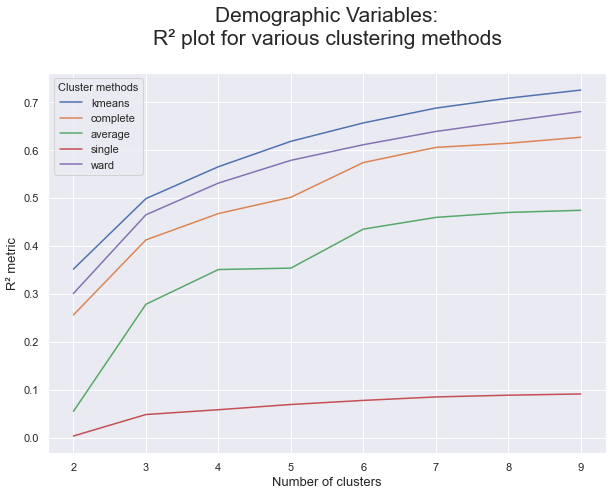

In [103]:
# Visualizing the R² scores for each cluster solution on demographic variables
pd.DataFrame(r2_scores).plot.line(figsize=(10,7))

plt.title("Demographic Variables:\nR² plot for various clustering methods\n", fontsize=21)
plt.legend(title="Cluster methods", title_fontsize=11)
plt.xlabel("Number of clusters", fontsize=13)
plt.ylabel("R² metric", fontsize=13)
plt.show()

In [107]:
# Final Kmeans clustering solution
number_clusters = 4
kmeans = KMeans(n_clusters=number_clusters, init='k-means++', n_init=15, random_state=1)
km_labels = kmeans.fit_predict(df_out)
km_labels

# Characterizing the final clusters
df_concat = pd.concat((df_out, pd.Series(km_labels.astype(int), name='kmeans labels')), axis=1)
df_centroids = df_concat.groupby('kmeans labels').mean()
df_centroids

,xG,xGA,ppda_coef,oppda_coef,deep_allowed,PredictedPoints
kmeans labels,,,,,,
0,41.090077,60.670448,13.098495,9.394467,292.814516,39.003313
1,48.505681,42.367059,10.153575,11.125977,177.873950,53.644604
2,43.031349,51.311615,11.392955,9.746630,229.382222,42.807484
3,60.522778,31.347172,8.860628,15.028495,128.670103,66.357596


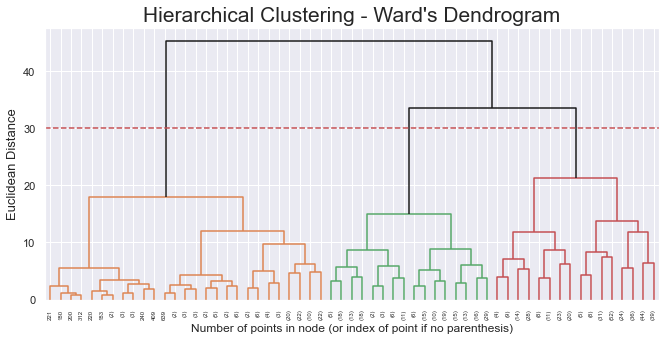

In [110]:
# Setting distance_threshold=0 and n_clusters=None ensures we compute the full tree
linkage = 'ward'
distance = 'euclidean'
hc_sociodem = AgglomerativeClustering(linkage=linkage, affinity=distance, distance_threshold=0, n_clusters=None)
hc_sociodem.fit_predict(df_norm)

# Dendrogram

# create the counts of samples under each node (number of points being merged)
counts = np.zeros(hc_sociodem.children_.shape[0])
n_samples = len(hc_sociodem.labels_)

# hclust.children_ contains the observation ids that are being merged together
# At the i-th iteration, children[i][0] and children[i][1] are merged to form node n_samples + i
for i, merge in enumerate(hc_sociodem.children_):
    # track the number of observations in the current cluster being formed
    current_count = 0
    for child_idx in merge:
        if child_idx < n_samples:
            # If this is True, then we are merging an observation
            current_count += 1  # leaf node
        else:
            # Otherwise, we are merging a previously formed cluster
            current_count += counts[child_idx - n_samples]
    counts[i] = current_count

# the hclust.children_ is used to indicate the two points/clusters being merged (dendrogram's u-joins)
# the hclust.distances_ indicates the distance between the two points/clusters (height of the u-joins)
# the counts indicate the number of points being merged (dendrogram's x-axis)
linkage_matrix = np.column_stack(
    [hc_sociodem.children_, hc_sociodem.distances_, counts]
).astype(float)

# Plot the corresponding dendrogram
sns.set()
fig = plt.figure(figsize=(11,5))
# The Dendrogram parameters need to be tuned
y_threshold = 30
dendrogram(linkage_matrix, truncate_mode='level', p=5, color_threshold=y_threshold, above_threshold_color='k')
plt.hlines(y_threshold, 0, 1000, colors="r", linestyles="dashed")
plt.title(f'Hierarchical Clustering - {linkage.title()}\'s Dendrogram', fontsize=21)
plt.xlabel('Number of points in node (or index of point if no parenthesis)')
plt.ylabel(f'{distance.title()} Distance', fontsize=13)
plt.show()

In [112]:
df_concat 

,xG,xGA,ppda_coef,oppda_coef,deep_allowed,PredictedPoints,kmeans labels
0,102.980152,28.444293,5.683535,16.367593,114,90.666667,3
1,95.766243,42.607198,10.209085,12.929510,153,90.666667,3
2,57.047670,29.069107,8.982028,9.237091,123,82.066667,3
3,55.062500,39.392572,8.709827,7.870225,172,71.354167,1
4,69.526624,47.862742,8.276148,9.477805,168,68.692308,1
...,...,...,...,...,...,...,...
679,36.456222,38.850259,12.838079,10.562327,206,35.215054,2
680,33.901702,40.626196,11.199502,10.806357,206,35.215054,2
681,33.579462,42.980693,11.949903,10.080858,215,35.215054,2
682,26.007424,39.747938,14.666049,9.192768,270,26.428571,0
